# Modelling an FBG by generating a transmission spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from fbg import *

First you need to download a spectrum from NASA's PSG and convert it to a numpy array.

See walkthrough here: https://sail-labs.github.io/FBG-Sensor/psg.html

In [2]:
filepath = 'spectra_files/psg_trn.txt'
data = psg_to_numpy(filepath, verbose=False)

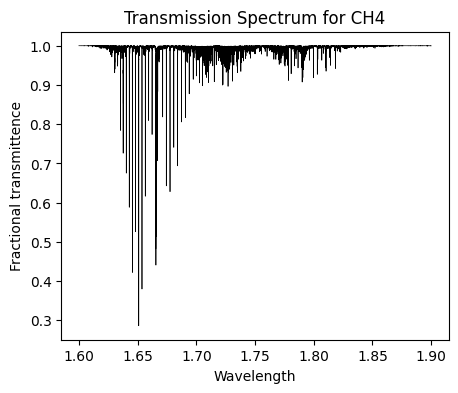

In [3]:
plt.figure(figsize=(5,4))
plt.plot(data[:, 0], data[:,1], color='black', linewidth=0.5)
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

For this little demo, we're going to work with a subset of this data to make the visualisations clearer.

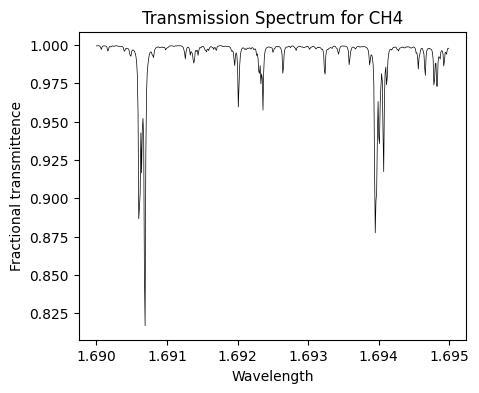

In [4]:
subset = data[9000:9500]

plt.figure(figsize=(5,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5)
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.show()

## Locating peaks

Next, we'll locate the downard peaks by specifying a threshold. Peaks will only register if the drop below the specified threshold. The distance parameter is used to limit the number of peaks that can be in close vicinity to each other.

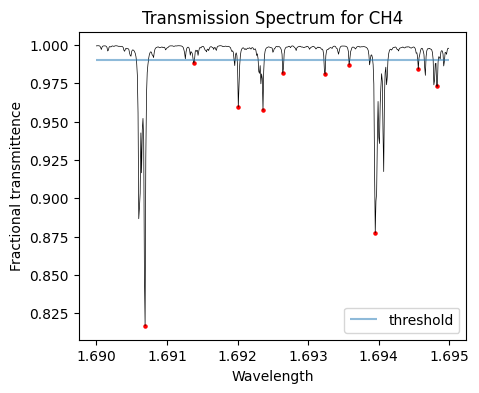

In [5]:
peaks = locate_peaks(subset[:, 1], threshold=0.99, distance=20)

plt.figure(figsize=(5,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5)
plt.scatter(subset[peaks, 0], subset[peaks, 1], color='red', s=5)
plt.hlines(0.99, subset[:, 0].min(), subset[:, 0].max(), alpha=0.5, label='threshold')
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.legend()
plt.show()

## Modelling the spectrum

We can choose to either model the peaks with Gaussian or Lorentzian functions.

* `n` controls the number of samples you take so you are not limited by the sampling of the original dataset

* `sigma` controls the widths of the peaks

* `strain` controls strain applied to the fiber

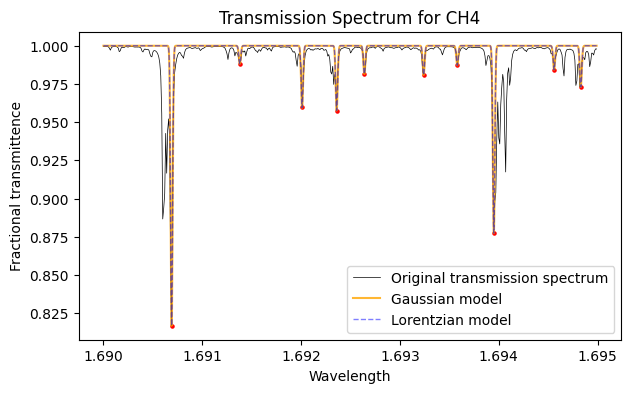

In [6]:
strain = 0

wavelength_gauss, trans_gauss = generate_spectrum(subset, peaks, strain, n=2000, sigma=1e-5, type='Gaussian')
wavelength_lortz, trans_lortz = generate_spectrum(subset, peaks, strain, n=2000, sigma=1e-5, type='Lorentzian')

plt.figure(figsize=(7,4))
plt.plot(subset[:, 0], subset[:,1], color='black', linewidth=0.5, label='Original transmission spectrum')
plt.scatter(subset[peaks, 0], subset[peaks, 1], color='red', s=5)
plt.plot(wavelength_gauss, trans_gauss, color='orange', alpha=0.8, label='Gaussian model')
plt.plot(wavelength_gauss, trans_gauss, color='blue', linestyle='dashed', linewidth=1, alpha=0.5, label='Lorentzian model')
plt.xlabel('Wavelength')
plt.ylabel('Fractional transmittence')
plt.title('Transmission Spectrum for CH4')
plt.legend()
plt.show()